### Name : Muhammad Irfan Karim
#### SRIWIJAYA UNIVERSITY

### Import Important Library

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

### Making path for dataset

In [57]:
nama_dataset1 = 'Customer'
nama_dataset2 = 'Product'
nama_dataset3 = 'Store'
nama_dataset4 = 'Transaction'
path1 = f'Case Study - {nama_dataset1}.csv'
path2 = f'Case Study - {nama_dataset2}.csv'
path3 = f'Case Study - {nama_dataset3}.csv'
path4 = f'Case Study - {nama_dataset4}.csv'

### Reading all 4 data

In [58]:
df_customer = pd.read_csv(f'{path1}')

In [59]:
df_customer.head()

,CustomerID,Age,Gender,Marital_Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [60]:
df_product= pd.read_csv(f'{path2}')

In [61]:
df_product

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


In [62]:
df_store = pd.read_csv(f'{path3}')

In [63]:
df_store

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816,666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914,864","107,608,238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797,068","110,370,529"
3,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664"
4,5,Bonafid,Gita,General Trade,"-7,250,445","112,768,845"
5,6,Lingga,Lingga,Modern Trade,"-5,135,399","11,942,379"
6,7,Buana Indah,Buana,General Trade,"3,316,694","114,590,111"
7,8,Sinar Harapan,Harapan Baru,General Trade,"554,829","95,323,753"
8,9,Lingga,Lingga,Modern Trade,"-3,654,703","128,190,643"
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597,031","98,678,513"


In [64]:
df_transaction = pd.read_csv(f'{path4}')

In [65]:
df_transaction

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13


## Data Cleaning

#### 1.Customer Data

In [66]:
df_customer.describe()

,CustomerID,Age,Gender
count,447.000000,447.000000,447.000000
mean,224.000000,39.964206,0.458613
std,129.182042,12.503222,0.498842
min,1.000000,18.000000,0.000000
25%,112.500000,30.000000,0.000000
50%,224.000000,39.000000,0.000000
75%,335.500000,50.500000,1.000000
max,447.000000,72.000000,1.000000


In [67]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital_Status  447 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [68]:
df_customer.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital_Status    0
Income            0
dtype: int64

In [69]:
df_customer['Income'] = df_customer['Income'].str.replace(',', '.')

In [70]:
# dapat dilihat diatas bahwa tipe data dari income adalah object seharusnya tipe data nya berupa float
# mari kita lakukan transformasi data pada kolom income untuk mengubah tipe data
df_customer['Income'] = df_customer['Income'].astype(float)
# Setelah diubah lakukan pengecekan kembali terhadap tipe data pada kolom Income
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital_Status  447 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


#### 2.Product Data

In [71]:
df_product.describe()

,Price
count,10.000000
mean,10410.000000
std,4890.455557
min,3200.000000
25%,7825.000000
50%,9700.000000
75%,14250.000000
max,18000.000000


In [72]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [73]:
df_product.isna().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

#### 3.Store Data

In [74]:
df_store.describe()

,StoreID
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


In [75]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [76]:
df_store['Latitude'] = df_store['Latitude'].str.replace(',', '')
df_store['Longitude'] = df_store['Longitude'].str.replace(',', '')

In [77]:
#ubah tipe data object menjadi float
df_store['Latitude']  = df_store['Latitude'].astype(float)
df_store['Longitude'] = df_store['Longitude'].astype(float)
# Setelah diubah lakukan pengecekan kembali terhadap tipe data pada kolom Income
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


In [78]:
df_store.isna().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

#### 4.Transaction Data

In [79]:
df_transaction.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841
std,129.672955,4600.708780,1.855295,19675.462455,4.028502
min,1.000000,3200.000000,1.000000,7500.000000,1.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000


In [80]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


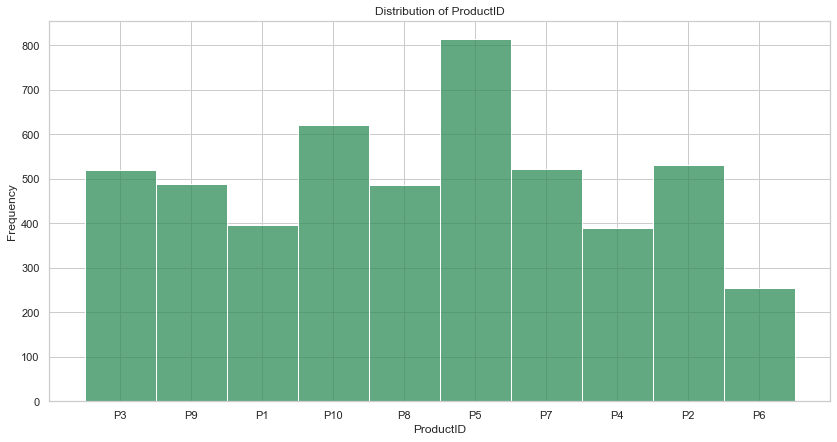

In [81]:
# Membuat visualisasi untuk melihat persebaran product id
sns.set(style='whitegrid')

# Membuat histogram menggunakan Seaborn
sns.histplot(data=df_transaction, x='ProductID', bins=10, kde=False, color='seagreen')
plt.xlabel('ProductID')
plt.ylabel('Frequency')
plt.title('Distribution of ProductID')
plt.show()

In [82]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [83]:
# Mengubah tibe data date dari object menjadi datetime[64ns]
df_transaction['Date'] = df_transaction['Date'].astype('datetime64[ns]')
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


In [84]:
df_transaction.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

### Data Merge

In [85]:
# Merge df_transaction with df_customer using CustomerID
merged_df = df_transaction.merge(df_customer, on='CustomerID', how='left')

# Merge merged_df with df_product using ProductID
merged_df = merged_df.merge(df_product, on='ProductID', how='left')

# Merge merged_df with df_store using StoreID
merged_df = merged_df.merge(df_store, on='StoreID', how='left')

# Now you have a single dataframe that combines information from all four dataframes
display(merged_df)

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital_Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2990934.0,104756554.0
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt,10000,Prima Tendean,Prima,Modern Trade,-62.0,106816666.0
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,0.18,Choco Bar,8800,Gita Ginara,Gita,General Trade,-6966667.0,110416664.0
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,12.57,Choco Bar,8800,Gita Ginara,Gita,General Trade,-6966667.0,110416664.0
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt,10000,Gita Ginara,Gita,General Trade,-6966667.0,110416664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR54423,243,2022-12-31,P10,15000,5,75000,3,38,0,Married,3.34,Cheese Stick,15000,Prima Kota,Prima,Modern Trade,-7797068.0,110370529.0
5016,TR5604,271,2022-12-31,P2,3200,4,12800,9,29,0,Married,4.74,Ginger Candy,3200,Lingga,Lingga,Modern Trade,-3654703.0,128190643.0
5017,TR81224,52,2022-12-31,P7,9400,6,56400,9,37,0,Married,3.73,Coffee Candy,9400,Lingga,Lingga,Modern Trade,-3654703.0,128190643.0
5018,TR85016,18,2022-12-31,P8,16000,3,48000,13,47,0,Married,13.60,Oat,16000,Buana,Buana,General Trade,-126916.0,116825264.0


In [86]:
merged_df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital_Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2990934.0,104756554.0
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt,10000,Prima Tendean,Prima,Modern Trade,-62.0,106816666.0
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,0.18,Choco Bar,8800,Gita Ginara,Gita,General Trade,-6966667.0,110416664.0
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,12.57,Choco Bar,8800,Gita Ginara,Gita,General Trade,-6966667.0,110416664.0
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt,10000,Gita Ginara,Gita,General Trade,-6966667.0,110416664.0


In [87]:
merged_df.tail()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital_Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
5015,TR54423,243,2022-12-31,P10,15000,5,75000,3,38,0,Married,3.34,Cheese Stick,15000,Prima Kota,Prima,Modern Trade,-7797068.0,110370529.0
5016,TR5604,271,2022-12-31,P2,3200,4,12800,9,29,0,Married,4.74,Ginger Candy,3200,Lingga,Lingga,Modern Trade,-3654703.0,128190643.0
5017,TR81224,52,2022-12-31,P7,9400,6,56400,9,37,0,Married,3.73,Coffee Candy,9400,Lingga,Lingga,Modern Trade,-3654703.0,128190643.0
5018,TR85016,18,2022-12-31,P8,16000,3,48000,13,47,0,Married,13.60,Oat,16000,Buana,Buana,General Trade,-126916.0,116825264.0
5019,TR85684,55,2022-12-31,P8,16000,1,16000,6,34,1,Married,8.44,Oat,16000,Lingga,Lingga,Modern Trade,-5135399.0,11942379.0


In [88]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price_x         5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital_Status  5020 non-null   object        
 11  Income          5020 non-null   float64       
 12  Product Name    5020 non-null   object        
 13  Price_y         5020 non-null   int64         
 14  StoreName       5020 non-null   object        
 15  Grou

### Making Regression time series Arima (Autoregressive Integrated Moving Average) with Scalecast 

In [89]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima

In [93]:
# Group by 'Date' and aggregate 'Qty' using sum
regression_data = merged_df.groupby('Date')['Qty'].sum().reset_index()

# Print the resulting dataframe
regression_data

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


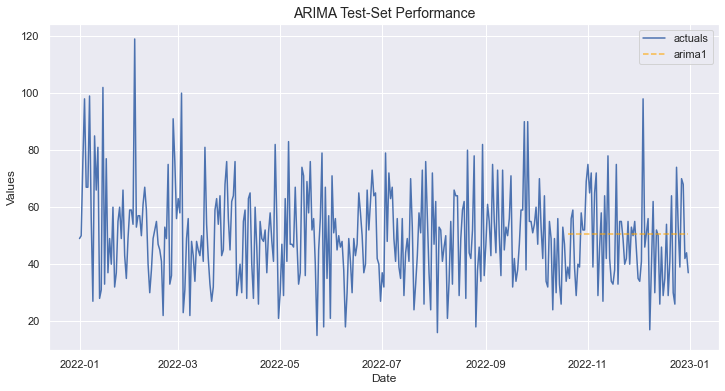

In [94]:
sns.set(rc={'figure.figsize':(14,7)})

f = Forecaster(y=regression_data['Qty'],current_dates=regression_data['Date'])

f.generate_future_dates(12) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

f.plot_test_set(ci=True) # view test results
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

### Sepertinya hasil dari forecast terlihat kurang memuaskan maka dari itu kita akan menggunakan grid search untuk mencari hasil yang terbaik

## Grid search the optimal orders in scalecast

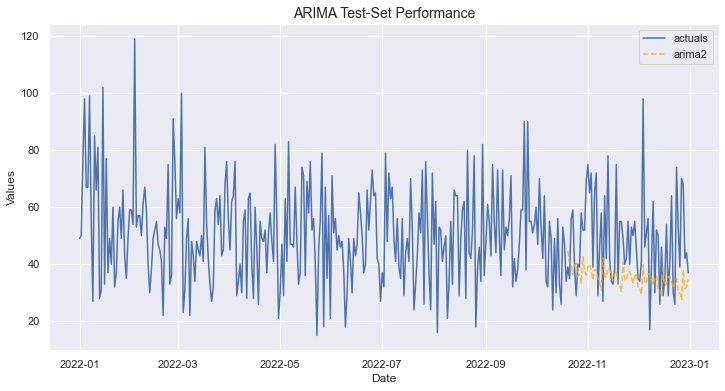

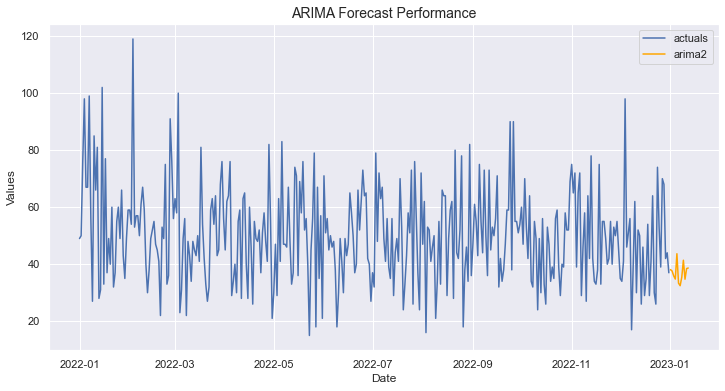

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  365
Model:             ARIMA(1, 1, 0)x(2, 1, [1], 12)   Log Likelihood               -1576.388
Date:                            Sun, 27 Aug 2023   AIC                           3162.776
Time:                                    13:39:19   BIC                           3182.094
Sample:                                         0   HQIC                          3170.464
                                            - 365                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5181      0.047    -11.088      0.000      -0.610      -0.426
ar.S.L12       0.0289      0.062      0.468      0.640      -0.092       0.150
ar.S.L24       0.0259      0.069      0.374      0.708      -0.110       0.162
ma.S.L12      -0.9919      0.306     -3.239      0.001      -1.592      -0.392
sigma2       408.6878    120.660      3.387      0.001     172.199     645.176
===================================================================================
Ljung-Box (L1) (Q):                  13.08   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.00   Prob(JB):                         0.80
Heteroskedasticity (H):               0.69   Skew:                            -0.09
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima2')

f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

f.regr.summary()

## Clustering with KMeans

In [96]:
# Group by 'Date' and aggregate 'Qty' using sum
regression_data = merged_df.groupby('Date')['Qty'].sum().reset_index()

# Print the resulting dataframe
regression_data

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


In [97]:
merged_df.columns

Index(['TransactionID', 'CustomerID', 'Date', 'ProductID', 'Price_x', 'Qty',
       'TotalAmount', 'StoreID', 'Age', 'Gender', 'Marital_Status', 'Income',
       'Product Name', 'Price_y', 'StoreName', 'GroupStore', 'Type',
       'Latitude', 'Longitude'],
      dtype='object')

In [98]:
# Melakukan operasi grouping dan agregasi
clustering_data = merged_df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

clustering_data

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [99]:
clustering_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     447 non-null    int64
 1   TransactionID  447 non-null    int64
 2   Qty            447 non-null    int64
 3   TotalAmount    447 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


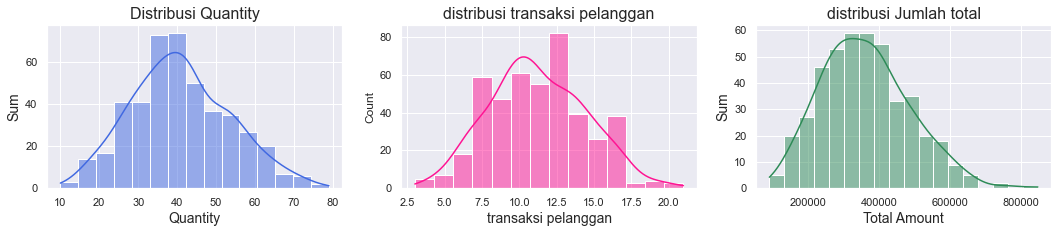

In [100]:
plt.figure(figsize=(18,3))

plt.subplot(1,3,1)
sns.histplot(clustering_data['Qty'], color='royalblue', kde= True)
plt.title('Distribusi Quantity', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Sum', fontsize=14)

plt.subplot(1,3,2)
sns.histplot(clustering_data['TransactionID'], color='deeppink', kde= True)
plt.title('distribusi transaksi pelanggan', fontsize=16)
plt.xlabel('transaksi pelanggan', fontsize=14)


plt.subplot(1,3,3)
sns.histplot(clustering_data['TotalAmount'], color='seagreen', kde= True)
plt.title('distribusi Jumlah total', fontsize=16)
plt.xlabel('Total Amount', fontsize=14)
plt.ylabel('Sum', fontsize=14)

#plt.tight_layout()

plt.show()

In [101]:
X1=clustering_data[['Qty', 'TransactionID', 'TotalAmount']]
wcss=[]
for n in range(1, 11):
    model1=KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
    model1.fit(X1)
    wcss.append(model1.inertia_)
print(wcss)

[6928031859602.739, 2434755241638.529, 1233416630536.0542, 776512017046.2603, 504081360603.5857, 382121220808.07764, 277934833180.125, 212853440612.76346, 171266010275.35165, 137780280512.41772]


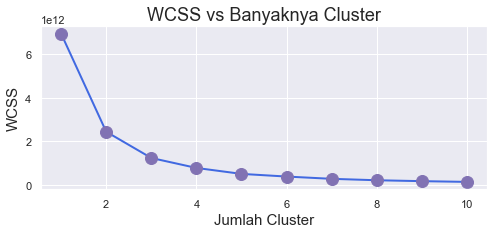

In [102]:
plt.figure(figsize=(8,3))
plt.plot(list(range(1, 11)), wcss, color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='m', markeredgecolor='m')
plt.title('WCSS vs Banyaknya Cluster', fontsize=18)
plt.xlabel('Jumlah Cluster', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.show()
#didapatkan menggunakan elbow method bahwa nilai k terbaik adalah 3

In [103]:
# Mengambil fitur yang akan digunakan
features = clustering_data[['Qty', 'TransactionID', 'TotalAmount']]

# Normalisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Jumlah kluster yang diinginkan
n_clusters = 3

# Melatih model KMeans
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=42)
clustering_labels = kmeans.fit_predict(scaled_features)
centroids = kmeans.cluster_centers_

# Menambahkan kolom Cluster ke DataFrame
clustering_data['Cluster'] = clustering_labels

# Menampilkan hasil klasterisasi
display(clustering_data)

,CustomerID,TransactionID,Qty,TotalAmount,Cluster
0,1,17,60,623300,1
1,2,13,57,392300,1
2,3,15,56,446200,1
3,4,10,46,302500,2
4,5,7,27,268600,0
...,...,...,...,...,...
442,443,16,59,485100,1
443,444,18,62,577700,1
444,445,18,68,587200,1
445,446,11,42,423300,2


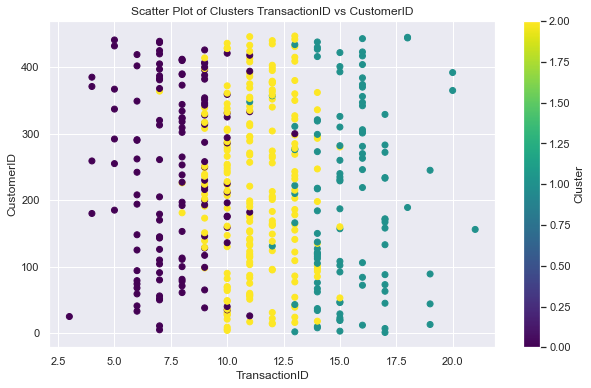

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data['TransactionID'], clustering_data['CustomerID'], c=clustering_data['Cluster'], cmap='viridis')
plt.xlabel('TransactionID')
plt.ylabel('CustomerID')
plt.title('Scatter Plot of Clusters TransactionID vs CustomerID')
plt.colorbar(label='Cluster')
#plt.savefig('Plot of clusters transactionId vs customerId')
plt.show()

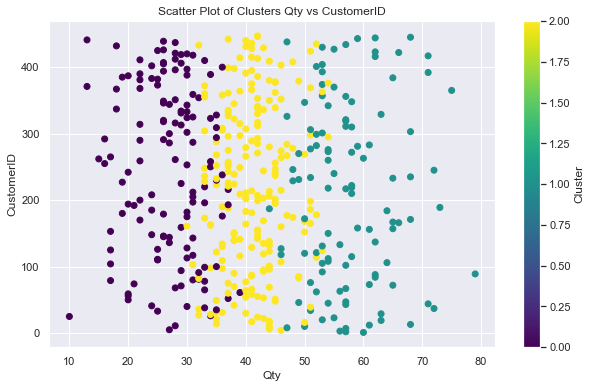

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data['Qty'], clustering_data['CustomerID'], c=clustering_data['Cluster'], cmap='viridis')
plt.xlabel('Qty')
plt.ylabel('CustomerID')
plt.title('Scatter Plot of Clusters Qty vs CustomerID')
plt.colorbar(label='Cluster')
#plt.savefig('plot of clusters qty vs customerId.png')
plt.show()

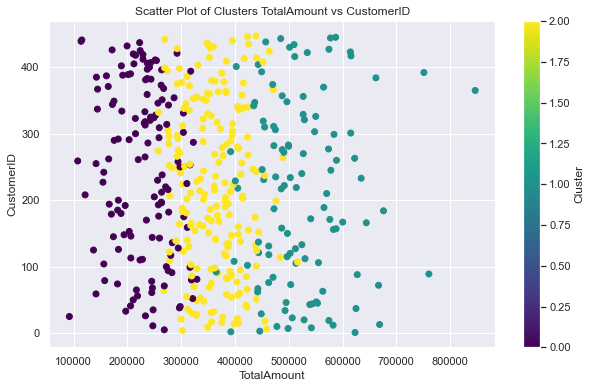

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data['TotalAmount'], clustering_data['CustomerID'], c=clustering_data['Cluster'], cmap='viridis')
plt.xlabel('TotalAmount')
plt.ylabel('CustomerID')
plt.title('Scatter Plot of Clusters TotalAmount vs CustomerID')
plt.colorbar(label='Cluster')
#plt.savefig('plot of clusters totalamount vs customerId.png')
plt.show()

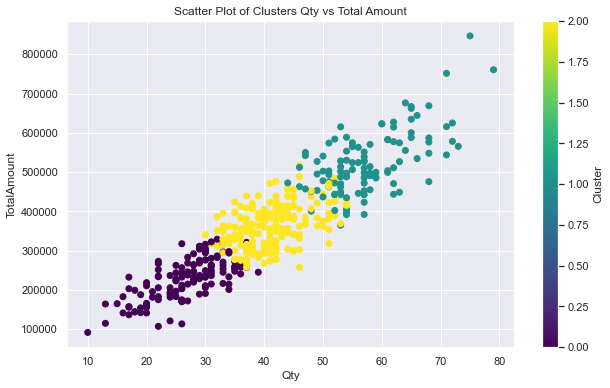

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data['Qty'], clustering_data['TotalAmount'], c=clustering_data['Cluster'], cmap='viridis')
plt.xlabel('Qty')
plt.ylabel('TotalAmount')
plt.title('Scatter Plot of Clusters Qty vs Total Amount')
plt.colorbar(label='Cluster')
#plt.savefig('plot of clusters qty vs total amount')
plt.show()

## Thankyou for reading!!
### By Muhammad Irfan Karim